<a href="https://colab.research.google.com/github/yasminebenbraiek/ML-Intro-Course/blob/main/1_Intro_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation des biblio

In [ ]:
import numpy as np #gerer les structures de donnees + ses fcts predefinies
np.set_printoptions (suppress=True) #convertir codage virgule flottant (les reels) => codage virgule fix
import pandas as pd #charger la dataset (base)
import warnings
import matplotlib.pyplot as plt #dresser les graphiques
warnings.filterwarnings('ignore') #ignorer les warnings

Chargement de data

In [ ]:
#churn est la variable contenant toute la dataset
churn=pd.read_csv('/content/Churn_Modelling.csv',sep=',',header=0)
churn.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#les types:
print(type(churn))
print(churn.shape)
#l'initialisation de colonnes d'attributs
X=churn.iloc[:,1:10].values
#l'initialistation de la colonne de classe
Y=churn.iloc[:, 10].values
#verif
print(X.shape) #matrice de 10000 lignes et de 9 colonnes
print(Y.shape) #vecteur de 10000 lignes
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
(10000, 11)
(10000, 9)
(10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Counter({0: 7963, 1: 2037})


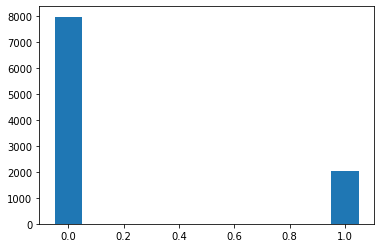

In [ ]:
from collections import Counter
histogram=Counter(Y) #Y la classe
print(histogram)
plt.bar(histogram.keys(),histogram.values(),0.1)
plt.savefig("colonneY.jpeg")
plt.show() #afficher le nombre des instances de la colonne Y (classe)

In [ ]:
ep=np.sum(Y==1)/len(Y)
nep=np.sum(Y==0)/len(Y)
# 0 est la 1ere variable, 1 est la 2eme variable, 3f est les chiffres apres .
print('Exited : {0:.3f} et not Exited : {1:.3f}'.format(ep,nep))

Exited : 0.204 et not Exited : 0.796


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#importation des algorithmes
from sklearn.tree import DecisionTreeClassifier

#importation de la matrice de confusion et ses metriques
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

#importation des standards de normalisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25, random_state=1)
#la repartition de la base: celle de test contiendra 25% des exemples de la base en total

print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)



(7500, 9)
(7500,)
(2500, 9)
(2500,)


# Decision Tree

Apprentissage

In [ ]:
ss=StandardScaler()
ss.fit(Xtrain)
ss.fit(Xtest)
Xtrain_norm=ss.transform(Xtrain)
Xtest_norm=ss.transform(Xtest)

In [ ]:
#initialisation de l'arbre
DT=DecisionTreeClassifier(random_state=0, criterion='entropy')

In [ ]:
#construction de l'arbre
DT.fit(Xtrain_norm,Ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#effectuer le test
YDT=DT.predict(Xtest_norm) #YDT: le resultat donnee par la machine
print(YDT)
print(YDT.shape)

[0 1 0 ... 0 0 1]
(2500,)


In [ ]:
print('** performance evaluation of decision tree **')
print(confusion_matrix(Ytest,YDT)) #generation de la matrice de confusion Test
print(classification_report(Ytest,YDT)) #generation  d'un affichage de calcul des metrics

** performance evaluation of decision tree **
[[1711  269]
 [ 247  273]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1980
           1       0.50      0.53      0.51       520

    accuracy                           0.79      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.80      0.79      0.80      2500



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#init
rfc = RandomForestClassifier(
    n_estimators=150, #number of trees
    criterion='entropy', #measure the quality of the split
    random_state=42, #pseudo-aleatoire, fixer le choix aleatoire, il sera commun a tt le monde
    #le choix des caracteristiques et les echantillons de chaque arbre
    min_samples_split=4, #minimum number of samples (exps) required to split an internal node
    min_samples_leaf=3, #minimum number of samples (exps) required to be at a leaf node (delete it/not consider it in the tree decision)
    max_features="log2", #features (les caracteristiques) at each split
    oob_score=True, #use out-of-bag samples to estimate the generalization score; we eliminate the tree if the number of false predictions is higher than 50%
    #if it is set to false, we use all trees without validations
    class_weight="balanced", #weights associated with classes in the form
    n_jobs=10, #number of jobs to run in parallel
    )

In [ ]:
#Apprentissage
rfc.fit(Xtrain,Ytrain)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', min_samples_leaf=3,
                       min_samples_split=4, n_estimators=150, n_jobs=10,
                       oob_score=True, random_state=42)

In [ ]:
#test
predicted_output = rfc.predict(Xtest)

In [ ]:
print(confusion_matrix(Ytest,predicted_output))
print(classification_report(Ytest,predicted_output))

[[1855  125]
 [ 238  282]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1980
           1       0.69      0.54      0.61       520

    accuracy                           0.85      2500
   macro avg       0.79      0.74      0.76      2500
weighted avg       0.85      0.85      0.85      2500



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
gnb.fit(Xtrain,Ytrain)

GaussianNB()

In [ ]:
Ynb=gnb.predict(Xtest)
YnT=gnb.predict(Xtrain)

In [ ]:
print('*** Performance evaluation of Naive ***')
print(confusion_matrix(Ytest,Ynb))
print(confusion_matrix(Ytrain,YnT))
print(classification_report(Ytest,Ynb))
print(classification_report(Ytrain,YnT))

*** Performance evaluation of Naive ***
[[1926   54]
 [ 487   33]]
[[5813  170]
 [1439   78]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1980
           1       0.38      0.06      0.11       520

    accuracy                           0.78      2500
   macro avg       0.59      0.52      0.49      2500
weighted avg       0.71      0.78      0.72      2500

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5983
           1       0.31      0.05      0.09      1517

    accuracy                           0.79      7500
   macro avg       0.56      0.51      0.48      7500
weighted avg       0.70      0.79      0.72      7500



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
sigmoid_svm = SVC(kernel='sigmoid')
poly_svm = SVC(kernel='poly',degree=2)

In [ ]:
linear_svm.fit(Xtrain,Ytrain)
rbf_svm.fit(Xtrain,Ytrain)
poly_svm.fit(Xtrain,Ytrain)
sigmoid_svm.fit(Xtrain,Ytrain)

In [ ]:
Ylinear_svm=linear_svm.predict(Xtest)
Yrbf_svm=rbf_svm.predict(Xtest)
Ypoly_svm=poly_svm.predict(Xtest)
Ysigmoid_svm=sigmoid_svm.predict(Xtest)

In [ ]:
print('*** Performance evaluation of Linear SVM ***')
print(confusion_matrix(Ytest,Ylinear_svm))
print(classification_report(Ytest,Ylinear_svm))
print('*** Performance evaluation of RBF SVM ***')
print(confusion_matrix(Ytest,Yrbf_svm))
print(classification_report(Ytest,Yrbf_svm))
print('*** Performance evaluation of Sigmoid SVM ***')
print(confusion_matrix(Ytest,Ysigmoid_svm))
print(classification_report(Ytest,Ysigmoid_svm))
print('*** Performance evaluation of Polynomial (2) SVM ***')
print(confusion_matrix(Ytest,Ypoly_svm))
print(classification_report(Ytest,Ypoly_svm))